# Large Deviation Principle - Binomial Distribution

Use Large Deviation Theory to calculate the distribution of sample means sampled from a binomial distribution.

\begin{equation}
p(x) = 1/2 \delta(x-1/2) + 1/2 \delta(x+1/2)
\end{equation}

Which means, scaled cumulative distribution function $\lambda$ is: 

\begin{equation}
\lambda(k) = \lim_{n\rightarrow \inf} \frac{1}{n} \ln \left< \exp nks  \right> = \ln cosh(k/2)
\end{equation}

With $s = \sum_i^n x_i$.

The rate function is given by the supremum of:

\begin{equation}
ks - \lambda(k) = ks - \ln cosh(k/2)
\end{equation}

Subject to $k$, which occurs for $k = 2\tanh^{-1}(2s)$ 

Which gives:

\begin{equation}
I(s) = 2s \tanh^{-1}(2s) - \ln\cosh(\tanh^{-1}(2s)/2)
\end{equation}

The probability distribution of the sample mean should then be approximately $p \asymp \exp(-nI(s))$.

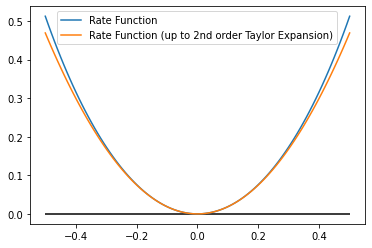

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rnd


s = np.linspace(-0.5,0.5,100)

def rate_function(s):
    return 2*s*np.arctanh(s) - np.log(np.cosh(np.arctanh(s)/2))

def rate_function_to_second_order(s):
    return (15/8)*s**2 

plt.plot(s,rate_function(s))
plt.plot(s,rate_function_to_second_order(s))
plt.hlines(xmin=min(s),xmax=max(s),y=0)

plt.legend(['Rate Function','Rate Function (up to 2nd order Taylor Expansion)'])

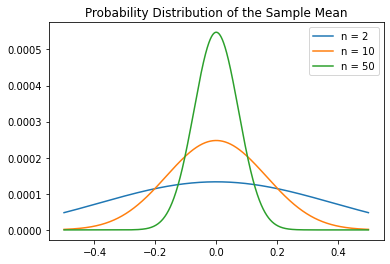

In [32]:
def sample_mean_probability(n):
    s = np.linspace(-0.5,0.5,10000)
    p = np.exp(-n*rate_function(s))
    p = p/np.sum(p)
    return s,p

def sample_mean_probability_approx(n):
    s = np.linspace(-0.5,0.5,10000)
    p = np.exp(-n*rate_function_to_second_order(s))
    p = p/np.sum(p)
    return s,p

N = [2,10,50]
for n in N:
    s, p = sample_mean_probability(n)
    plt.plot(s,p)
    
plt.legend(['n = %i' % n for n in N])
_ = plt.title("Probability Distribution of the Sample Mean")

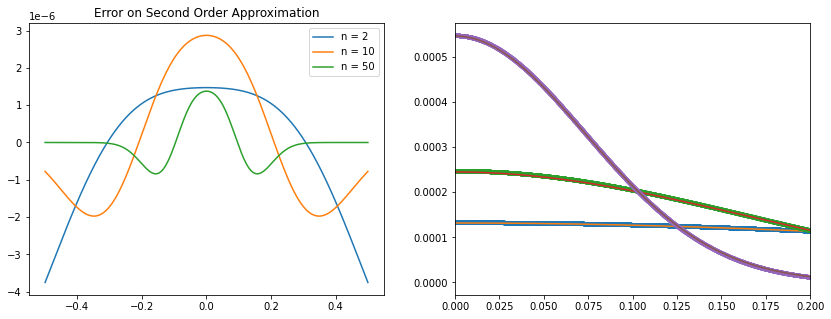

In [33]:
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

N = [2,10,50]
for n in N:
    s, p = sample_mean_probability(n)
    s, p_a = sample_mean_probability_approx(n)
    ax1.plot(s,p-p_a)
    ax2.plot(s,p,'.')
    ax2.plot(s,p_a)
    
ax2.set_xlim(0,0.2)
#ax2.set_ylim(-0.0001,0.001)
ax1.legend(['n = %i' % n for n in N])
_ = ax1.set_title("Error on Second Order Approximation")

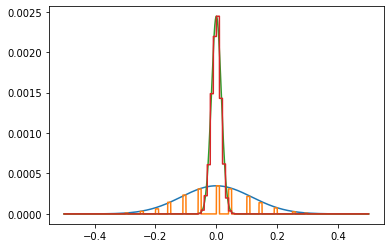

In [139]:
# The Experiment! 
import scipy.stats

def assign(x):
    if x < 0.5:
        return -1/2
    else:
        return 1/2

def sample_mean(n):
    s = np.mean([assign(x) for x in rnd.uniform(0,1,n)]) 
    return s

def distribution(n,N = 10000):
    
    data = [sample_mean(n) for i in range(N)]
    hist = np.histogram(data,bins=100,range=(-0.5,0.5))
    return scipy.stats.rv_histogram(hist)



N = [20,1000]
for n in N:
    s, p = sample_mean_probability(n)
    dist = distribution(n,N=10000)
    plt.plot(s,p)
    plt.plot(s,max(p)*dist.pdf(s)/max(dist.pdf(s)))
    

In the experiment, the histograms had to be artifially rescaled because the discretization concentrates data in spikes, while the large deviation results gives a continuous function. 

The shape of the distribution is correct, so that is encouraging. 

The normalization has to then be done by taking discretization into account -- i.e., calculate the possible values that can result, evaluate the PDF on them, and let those values sum to 1.

# Correctly Normalizing the Large Deviation Result:

This is done by evaluating the continuous LD result only at the discrete, possible values of the sample mean, and then dividing by the sum of the values.

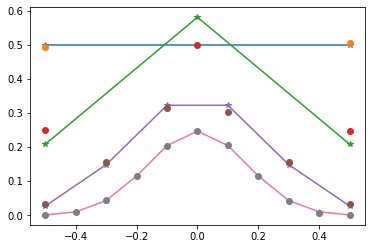

In [186]:
from collections import Counter

def possible_sample_means(n):
    s = [-0.5*(n-i) + i*0.5 for i in range(0,n+1)]
    return np.array(s)/n


def sample_mean_probability(n):
    s = possible_sample_means(n)
    p = np.exp(-n*rate_function(s))
    p = p/np.sum(p)
    return s,p


N = [1,2,5,10]
for n in N:
    s, p = sample_mean_probability(n)
    data = Counter([sample_mean(n) for i in range(10000)])
    s_exp = list(data.keys())
    p_exp = np.array(list(data.values()))/np.sum(list(data.values()))

    plt.plot(s,p,'-*')
    plt.plot(s_exp,p_exp,'o')
    

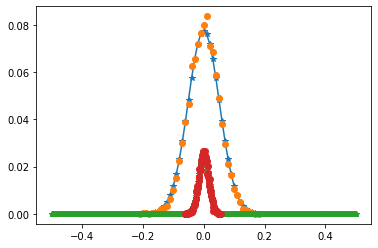

In [187]:
N = [100,1000]
for n in N:
    s, p = sample_mean_probability(n)
    data = Counter([sample_mean(n) for i in range(10000)])
    s_exp = list(data.keys())
    p_exp = np.array(list(data.values()))/np.sum(list(data.values()))

    plt.plot(s,p,'-*')
    plt.plot(s_exp,p_exp,'o')